In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [3]:
glossary = {
'AST': 'Assists',
'Pay': 'Player salary',
'2P': '2-Point Field Goals',
'2PA': '2-Point Field Goal Attempts',
'FG': 'Field Goals',
'FGA': 'Field Goal Attempts',
'FT': 'Free Throws',
'FTA': 'Free Throw Attempts',
'MP': 'Minutes Played',
'PTS': 'Points',
'TOV': 'Turnovers',
'VORP': 'Value Over Replacement: A box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season.',
'WS': 'An estimate of the number of wins contributed by a player.'
}

df_glossary = pd.DataFrame.from_dict(glossary, orient='index', columns=['Definition']).reset_index(level=0)

In [4]:
data = pd.read_csv('C:/Users/whisk/OneDrive/Documents/Bristol/Economics/Year 4/Data Science/slblundell.github.io/nba_project/data/player_per_game_salary_2023.csv')
data = data.drop(columns=['Unnamed: 0', '2023/24', '2024/25', '2025/26', '2026/27', '2027/28'])

data.head()

,Player,Pos,Age,Tm,MP,FG,FGA,FG%,3P,3PA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2022/23
0,Precious Achiuwa,C,23,TOR,18.3,2.6,6.9,0.379,0.3,2.1,...,20.9,-0.1,0.3,0.2,0.041,-2.6,-1.3,-3.9,-0.1,2840160
1,Steven Adams,C,29,MEM,26.8,3.5,6.2,0.574,0.0,0.0,...,14.2,0.8,1.8,2.6,0.131,-0.7,0.9,0.2,0.5,17926829
2,Bam Adebayo,C,25,MIA,35.4,8.6,15.8,0.544,0.0,0.3,...,26.4,1.7,1.9,3.6,0.137,0.5,0.6,1.1,1.0,30351780
3,Ochai Agbaji,SG,22,UTA,9.1,1.5,2.9,0.500,0.6,1.6,...,14.9,0.3,0.0,0.3,0.089,-1.1,-2.5,-3.6,-0.1,3918360
4,Santi Aldama,PF,22,MEM,22.9,3.3,7.0,0.467,1.3,3.5,...,15.2,1.3,1.3,2.6,0.154,0.0,1.6,1.6,0.7,2094120


In [5]:
corr = data.corr().abs()
corr = corr.loc[corr['2022/23']>.6]
corr.index
variables = list(corr.index)

In [6]:
var_heatmap = variables.copy()
df_correlations = data[var_heatmap].corr().reset_index(level=0).rename(columns={"2022/23": "Pay"}).replace({"2022/23": "Pay"})
df_correlations = df_correlations.melt('index', var_name='Variable', value_name='Correlation')

df_correlations = pd.merge(df_correlations, df_glossary, on='index').reset_index(drop=True)
df_correlations.to_csv('C:/Users/whisk/OneDrive/Documents/Bristol/Economics/Year 4/Data Science/slblundell.github.io/nba_project/data/chart_4_correlations.csv')

In [7]:
var_heatmap.insert(0, 'Player')
var_heatmap.insert(1, var_heatmap.pop(-1))
var_heatmap.insert(2, 'Tm')
var_heatmap.insert(3, 'Pos')

df_filter = data[var_heatmap].reset_index(drop=True).rename(columns={"2022/23": "Salary 2022/23"})


In [8]:
df_filter

,Player,Salary 2022/23,Tm,Pos,MP,FG,FGA,2P,2PA,FT,FTA,AST,TOV,PTS,WS,VORP
0,Precious Achiuwa,2840160,TOR,C,18.3,2.6,6.9,2.3,4.7,1.9,2.3,1.3,1.1,7.5,0.2,-0.1
1,Steven Adams,17926829,MEM,C,26.8,3.5,6.2,3.5,6.1,0.9,2.7,2.2,1.9,8.0,2.6,0.5
2,Bam Adebayo,30351780,MIA,C,35.4,8.6,15.8,8.6,15.6,4.5,5.5,3.2,2.9,21.8,3.6,1.0
3,Ochai Agbaji,3918360,UTA,SG,9.1,1.5,2.9,0.8,1.3,0.3,0.5,0.2,0.1,3.8,0.3,-0.1
4,Santi Aldama,2094120,MEM,PF,22.9,3.3,7.0,2.0,3.5,1.4,2.0,1.3,0.6,9.3,2.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Delon Wright,7804878,WAS,PG,19.2,1.9,4.9,1.4,2.5,1.2,1.5,3.4,0.6,5.5,0.6,0.4
487,McKinley Wright IV,508891,DAL,PG,10.5,0.8,1.9,0.8,1.5,0.4,0.6,1.2,0.7,2.0,0.1,-0.1
488,Thaddeus Young,8000000,TOR,PF,16.8,2.2,4.0,2.1,3.3,0.4,0.6,1.6,0.8,4.9,1.4,0.3
489,Trae Young,37096500,ATL,PG,35.7,8.7,20.9,6.5,13.7,7.7,8.7,9.9,3.9,27.4,2.9,1.5


In [9]:
df_filter.to_csv('C:/Users/whisk/OneDrive/Documents/Bristol/Economics/Year 4/Data Science/slblundell.github.io/nba_project/data/chart_4_player_data.csv')

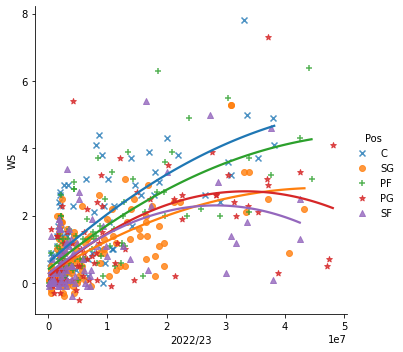

In [10]:
sns.lmplot(x="2022/23", y="WS", hue="Pos", data=data, order=2, markers=["x", "o", "+", "*", "^"], ci=None)